In [ ]:
# Install necessary Libraries
!pip install scikit-learn pandas numpy matplotlib seaborn

Test Accuracy: 0.866


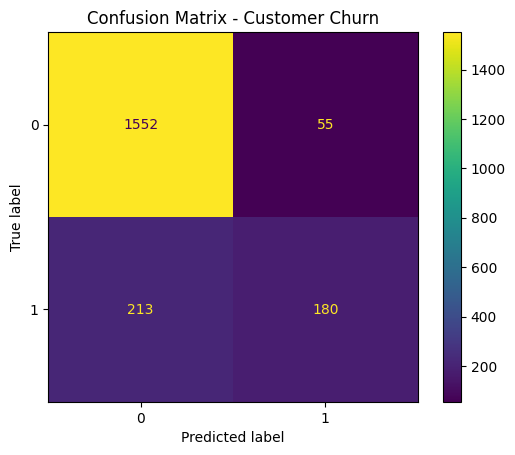

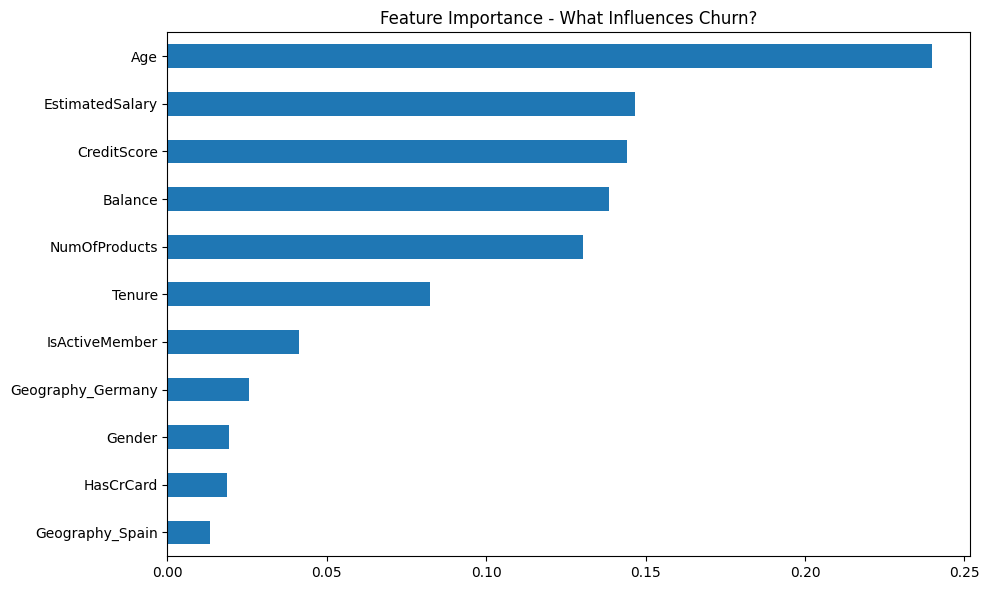

In [3]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 📂 Step 2: Load Dataset
df = pd.read_csv("datasets/Churn_Modelling.csv")

# 🧹 Step 3: Drop Irrelevant Columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# 🎯 Step 4: Define Target and Features
X = df.drop("Exited", axis=1)
y = df["Exited"]

# 🔠 Step 5: Encode Categorical Features (Geography, Gender)
le_gender = LabelEncoder()
X["Gender"] = le_gender.fit_transform(X["Gender"])  # Male = 1, Female = 0

# One-Hot Encode Geography
X = pd.get_dummies(X, columns=["Geography"], drop_first=True)

# 🧪 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 7: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Step 8: Evaluate the Model
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Customer Churn")
plt.show()

# 🔍 Step 9: Analyze Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance - What Influences Churn?")
plt.tight_layout()
plt.show()
